In [1]:
import os
os.chdir("/home/wzy/segment-anything/")
# !pip install -e.

In [2]:
from segment_anything import SamPredictor, sam_model_registry
import cv2
import numpy as np
import matplotlib.pyplot as plt
from demo_utils import *
import tqdm

In [3]:
sam = sam_model_registry["vit_h"](checkpoint="/home/wzy/segment-anything/checkpoints/sam_vit_h_4b8939.pth")


In [4]:
sam.image_encoder.img_size=1024
sam.to(device="cuda")
predictor = SamPredictor(sam)

In [5]:
def demo(image,out_path,input_point=[[128, 128]],thre=0.9):
    predictor.set_image(image)
    input_point = np.array(input_point)
    input_label = np.array([1]) # 前景与背景
    masks, scores, logits = predictor.predict(
        point_coords=input_point,
        point_labels=input_label,
        multimask_output=False,
    )
    # print(masks.shape) # (number_of_masks) x H x W
    for i, (mask, score) in enumerate(zip(masks, scores)):
        print(np.sum(mask[:,-3:-1]) + np.sum(mask[:,0:2])+np.sum(mask[-3:-1,:])+np.sum(mask[0:2,:]))
        print((mask.shape[0]+mask.shape[1])/8)
        if np.sum(mask[:,-3:-1]) + np.sum(mask[:,0:2])+np.sum(mask[-3:-1,:])+np.sum(mask[0:2,:])\
            >(mask.shape[0]+mask.shape[1])/8 or score<thre:
            
            print("false")
        plt.figure()
        plt.imshow(image)
        # show_box(input_box, plt.gca())
        show_mask(mask, plt.gca())
        show_points(input_point, input_label, plt.gca())
        plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
        plt.axis('off')
        # plt.savefig(f"./outputs/res{i}.jpg")
        plt.show()

In [6]:
def inference(image,out_path,input_point=[[128, 128]],thre=0.9):
    predictor.set_image(image)
    input_point = np.array(input_point)
    input_label = np.array([1]) # 前景与背景
    masks, scores, logits = predictor.predict(
        point_coords=input_point,
        point_labels=input_label,
        multimask_output=False,
    )
    # print(masks.shape) # (number_of_masks) x H x W

    for i, (mask, score) in enumerate(zip(masks, scores)):
        # print(np.sum(mask[:,-3:-1]) + np.sum(mask[:,0:2])+np.sum(mask[-3:-1,:])+np.sum(mask[0:2,:]))
        # print((mask.shape[0]+mask.shape[1])/8)

        plt.figure()
        plt.imshow(image)
        if not (np.sum(mask[:,-3:-1]) + np.sum(mask[:,0:2])+np.sum(mask[-3:-1,:])+np.sum(mask[0:2,:])\
            >(mask.shape[0]+mask.shape[1])/8 or score<thre):
            # print("false")
            show_mask(mask, plt.gca())
        show_points(input_point, input_label, plt.gca())
        plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
        plt.axis('off')
        plt.savefig(out_path,bbox_inches='tight')


In [7]:
dist=np.load("/home/wzy/segment-anything/data/newd.npy")


(1, 256, 256)
1013
64.0
false


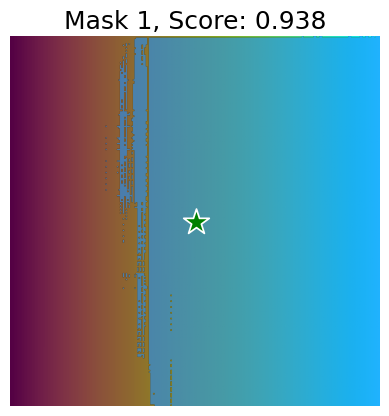

In [9]:
image=dist[3,530,:,:]
image=getImage(image,(256,256))
# plt.axis("off")
# plt.imshow(image)
# image = cv2.imread(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

predictor.set_image(image)
input_box = np.array([64,64,192,192])
input_point = np.array([[128, 128]])
input_label = np.array([1]) # 前景与背景
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    # box=input_box[None, :],
    multimask_output=False,
)
print(masks.shape) # (number_of_masks) x H x W
for i, (mask, score) in enumerate(zip(masks, scores)):
    print(np.sum(mask[:,-3:-1]) + np.sum(mask[:,0:2])+np.sum(mask[-3:-1,:])+np.sum(mask[0:2,:]))
    print((mask.shape[0]+mask.shape[1])/8)
    if np.sum(mask[:,-3:-1]) + np.sum(mask[:,0:2])+np.sum(mask[-3:-1,:])+np.sum(mask[0:2,:])\
        >(mask.shape[0]+mask.shape[1])/8 or score<0.9:
        
        print("false")
    plt.figure()
    plt.imshow(image)
    # show_box(input_box, plt.gca())
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    # plt.savefig(f"./outputs/res{i}.jpg")
    plt.show()

5
64.0


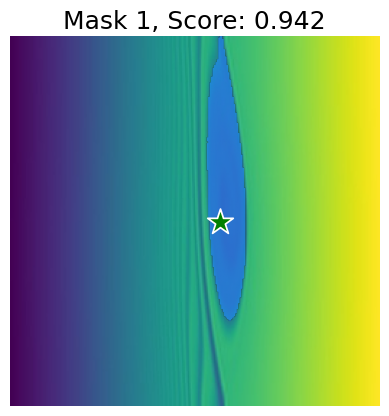

In [9]:
data_root="/home/wzy/segment-anything/"
i=500
image = cv2.imread(data_root+f'data/images/{i}.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
demo(image,data_root+f"./outputs/res_{i}.jpg",input_point=[[145,128]],thre=0.8)

 40%|████      | 20/50 [00:24<00:37,  1.23s/it]/tmp/ipykernel_31511/1298614610.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()
100%|██████████| 50/50 [01:02<00:00,  1.25s/it]


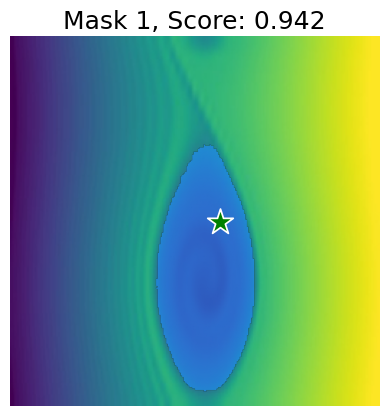

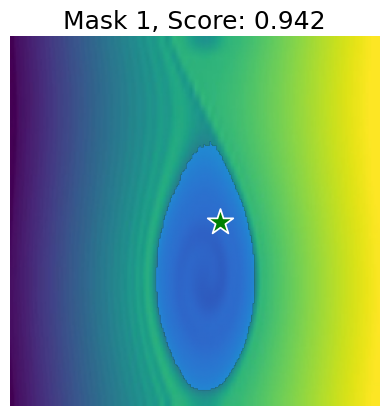

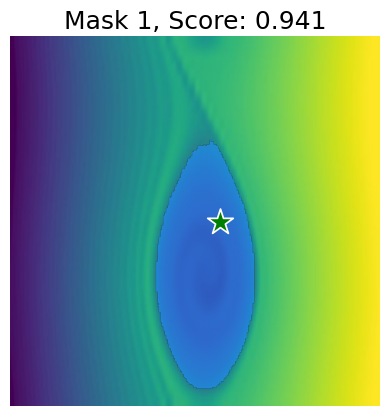

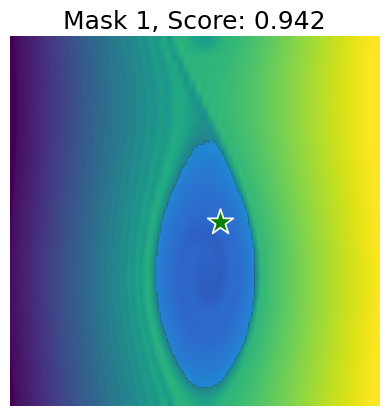

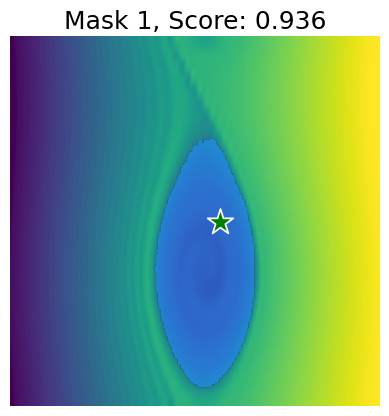

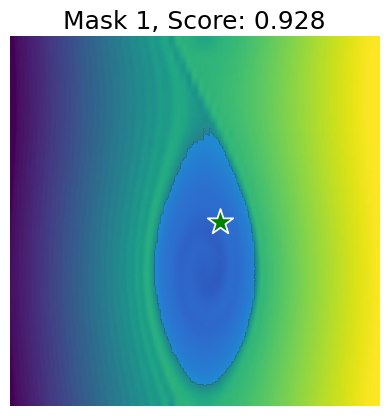

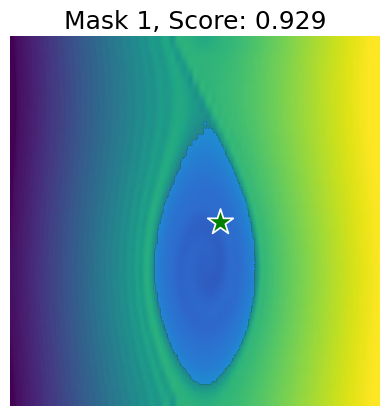

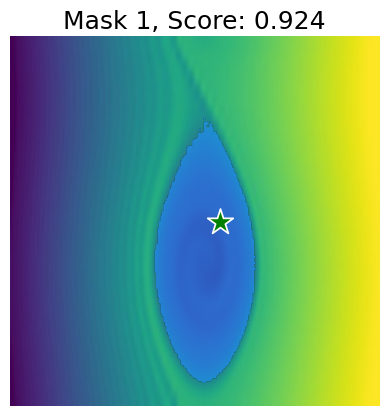

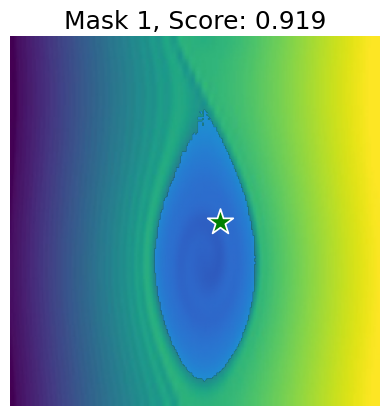

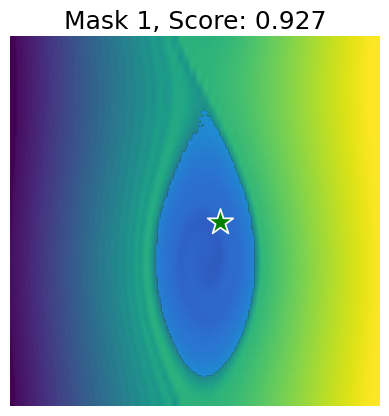

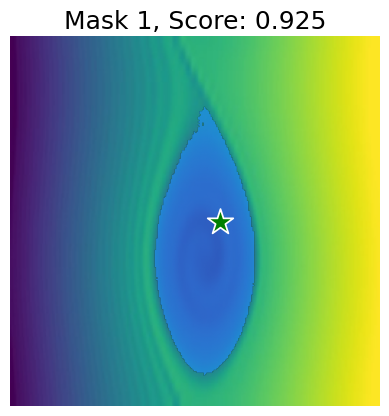

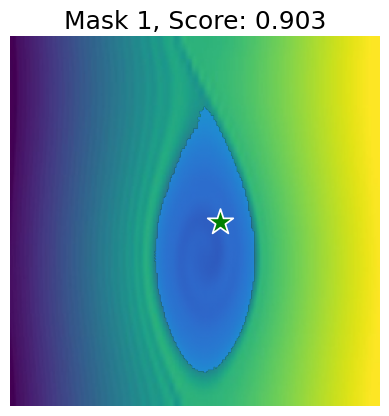

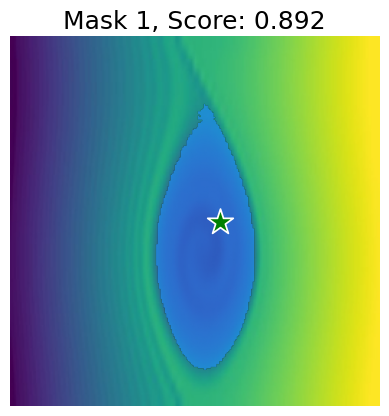

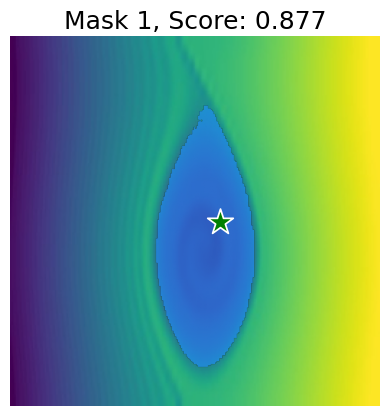

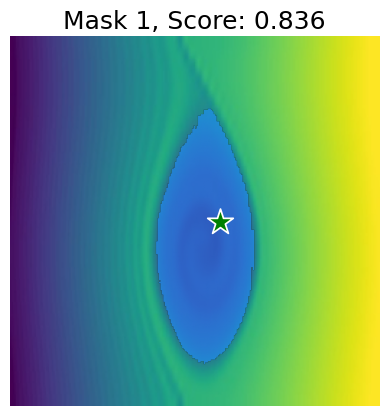

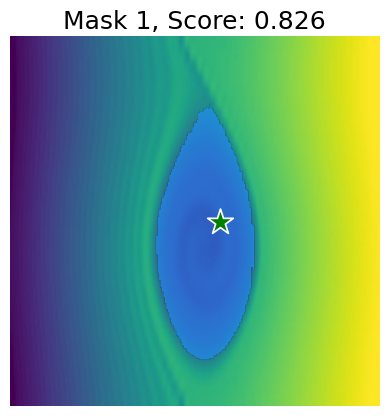

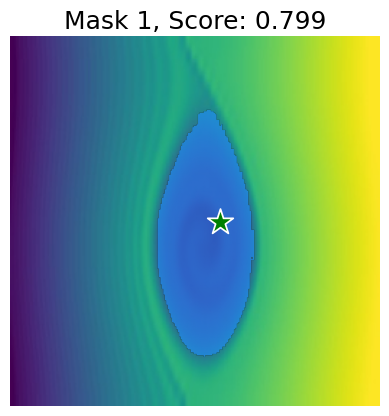

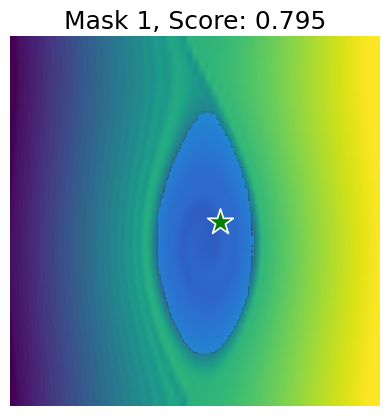

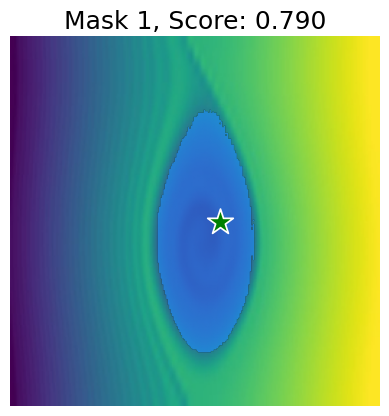

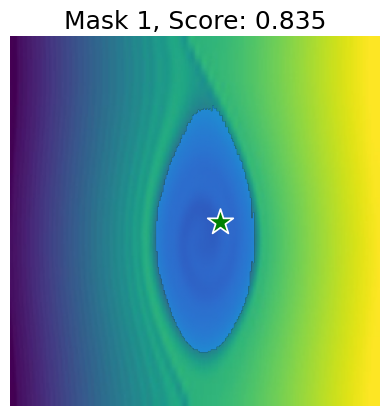

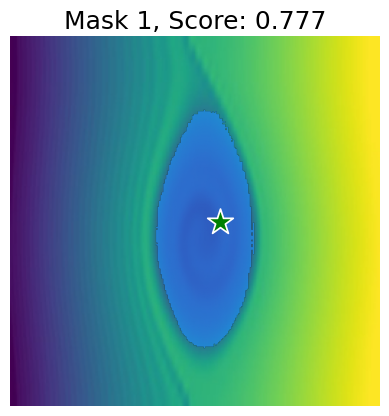

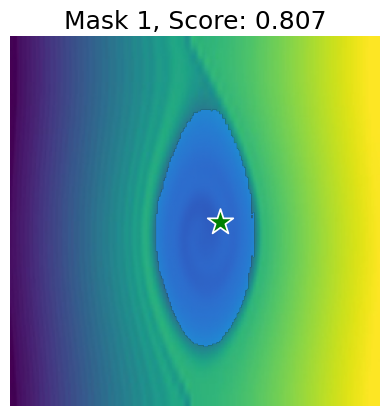

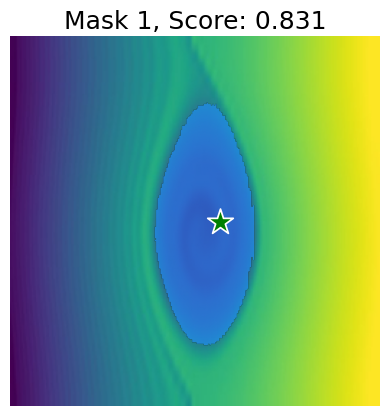

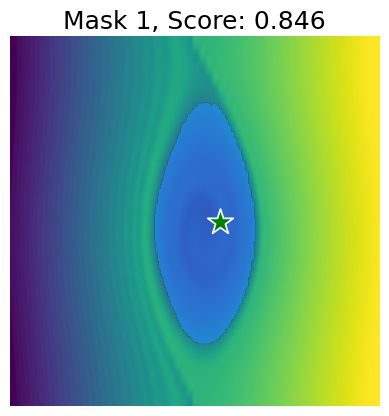

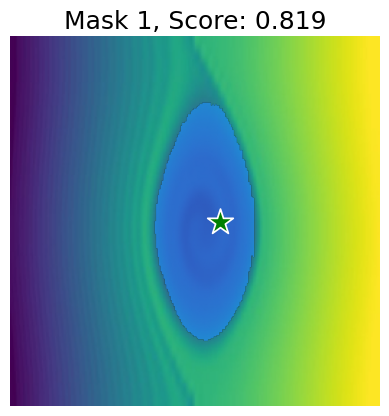

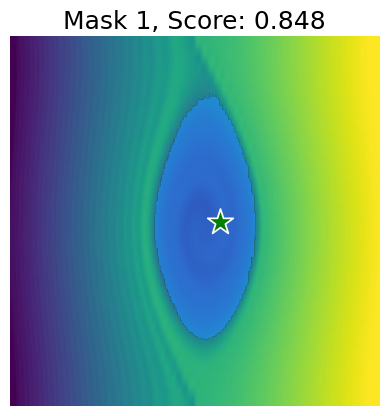

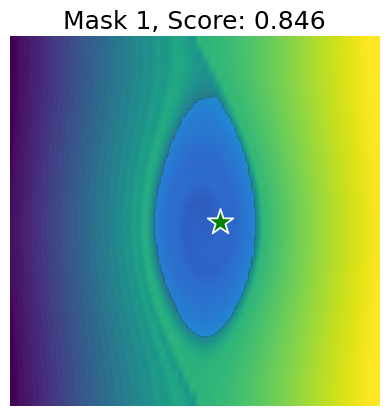

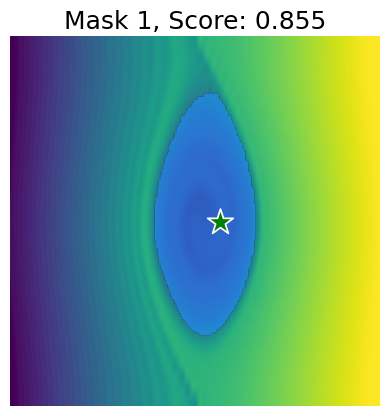

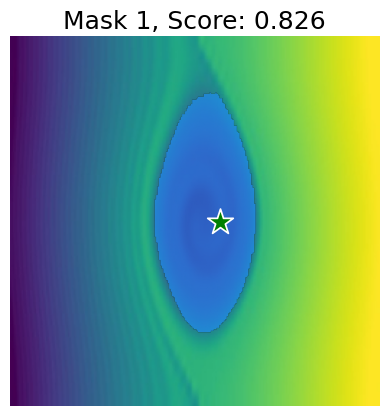

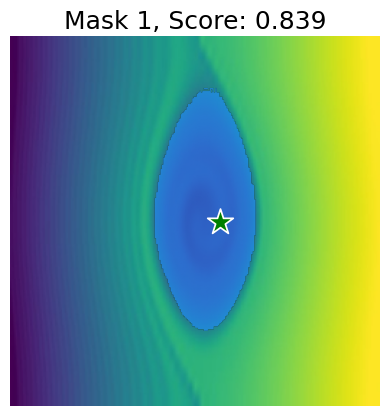

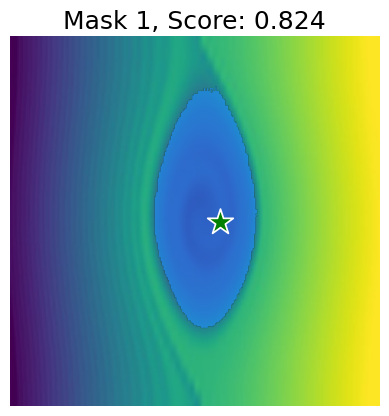

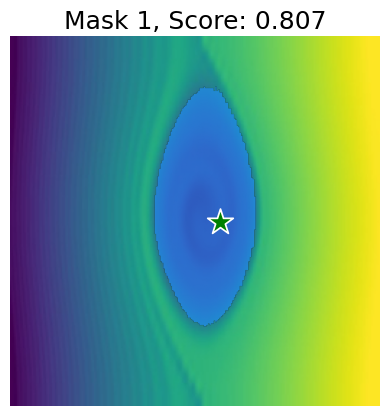

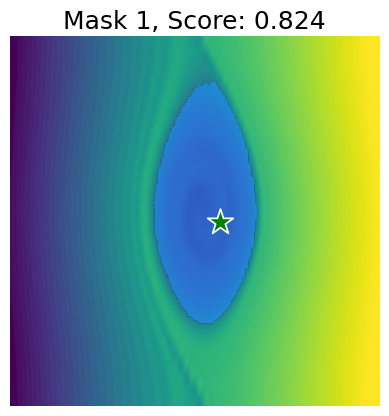

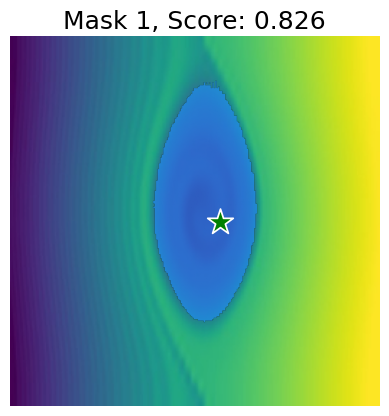

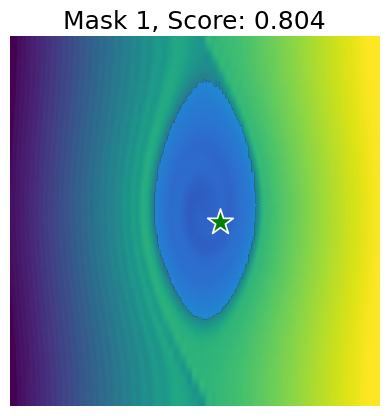

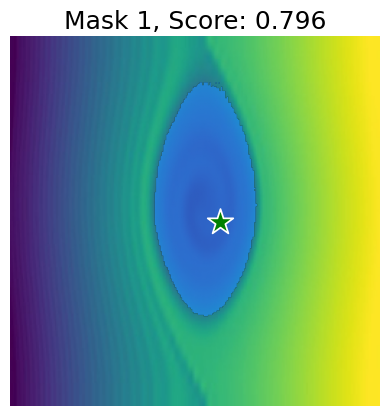

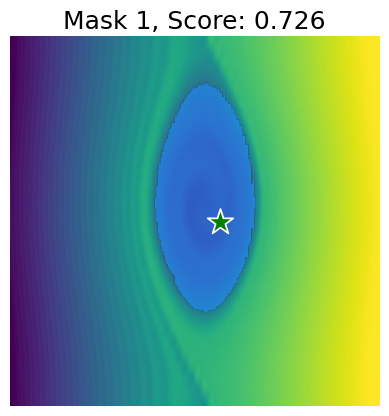

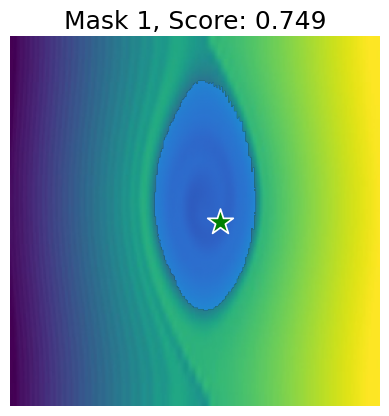

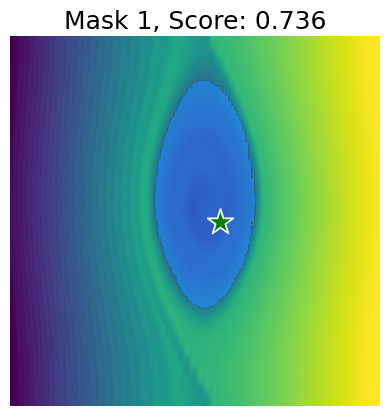

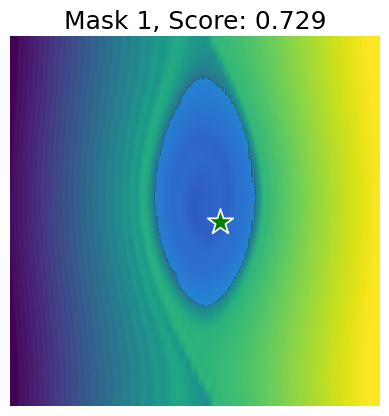

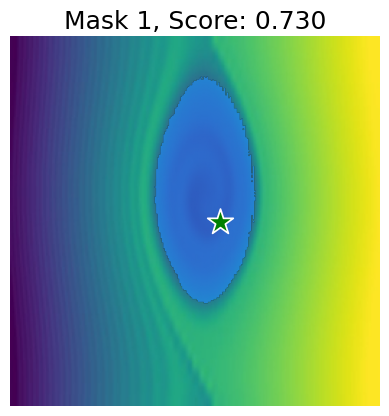

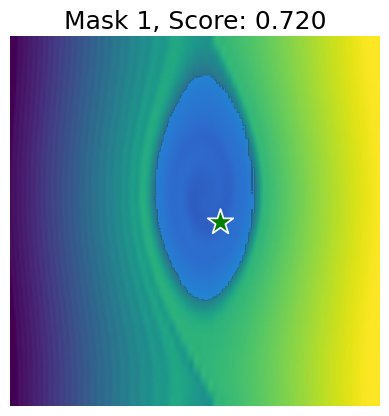

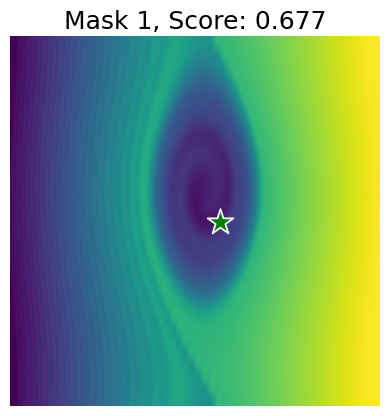

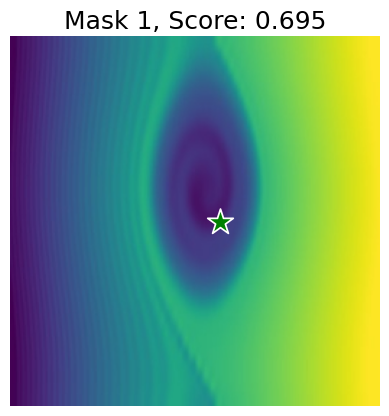

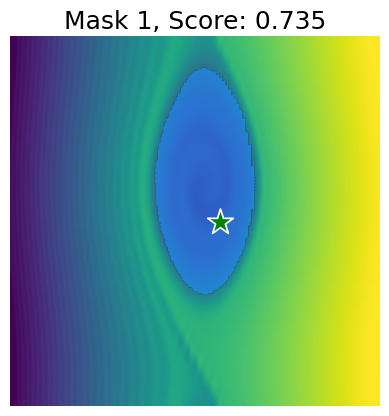

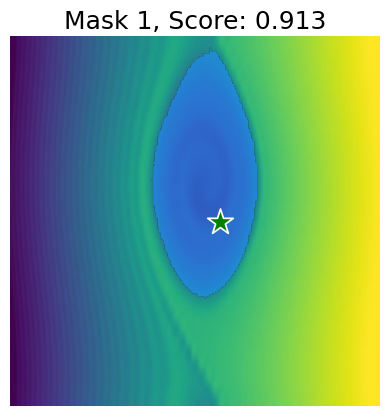

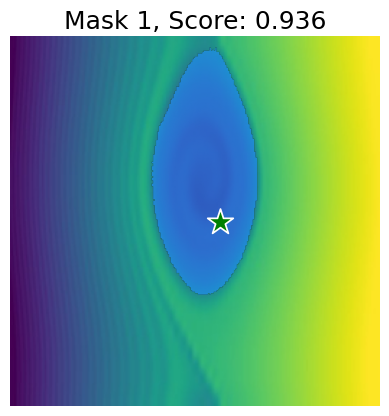

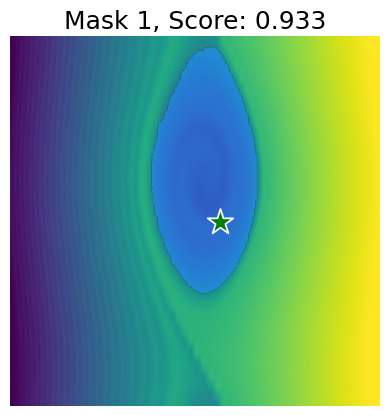

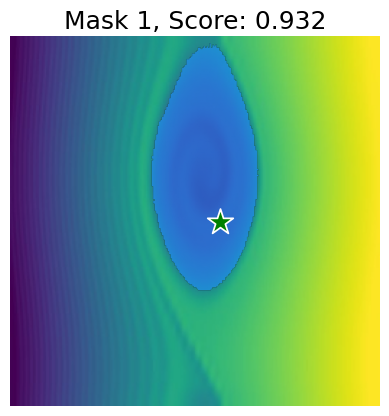

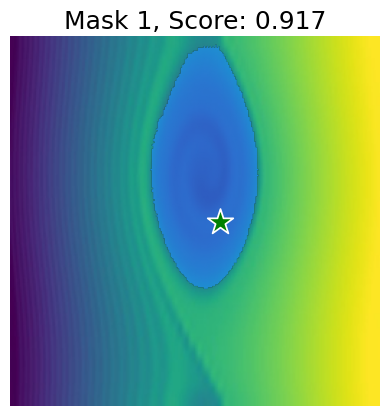

In [13]:
data_root="/home/wzy/segment-anything/"
for i in tqdm.tqdm(range(700,750)):
    image = cv2.imread(data_root+f'data/images/{i}.jpg')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    inference(image,data_root+f"./outputs/picts/res_{i}.jpg",input_point=[[145,128]],thre=0.7)